# Seaborn

## import

In [1]:
# seabornはsnsとしてインポート
import seaborn as sns
%matplotlib inline
# 他のライブラリをインポートしておく
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

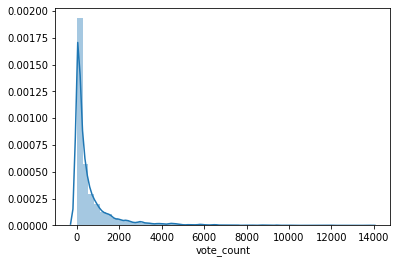

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
sns.distplot(df['vote_count'])

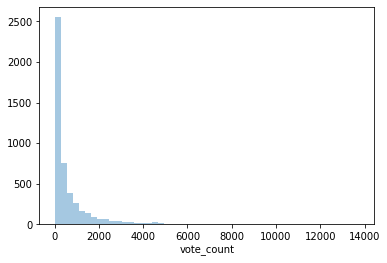

In [3]:
# normalizeではなくcountを見る
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

## sns.set()

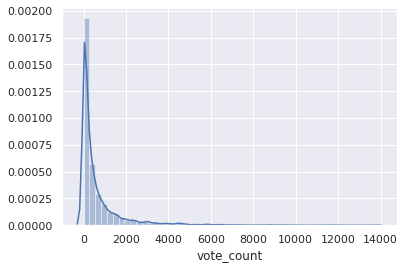

In [4]:
# スタイルが変わる
sns.set()
sns.distplot(df['vote_count'])

## sns.jointplot()

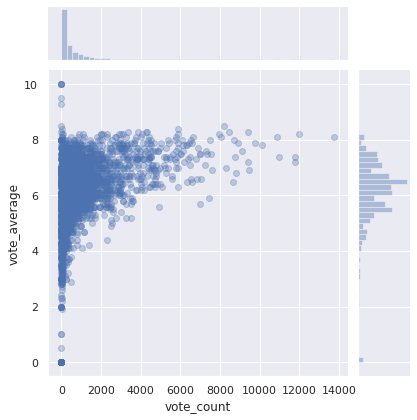

In [5]:
#　散布図+ヒストグラム
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.3)

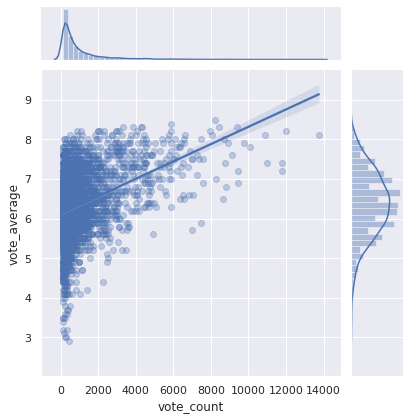

In [6]:
#　rgression
df = pd.read_csv('tmdb_5000_movies.csv')
# 100未満は信頼性が低いとする
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count',
                  y='vote_average',
                  data=df, kind='reg',
                  joint_kws = {'scatter_kws': dict(alpha=0.3)})

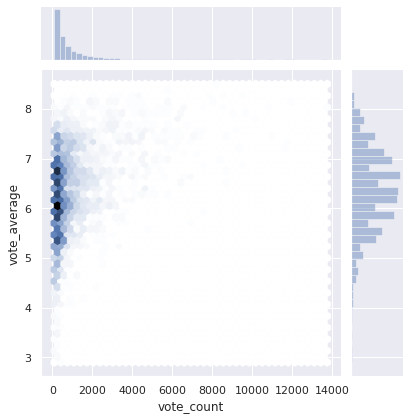

In [7]:
#　hexagonal bins
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='hex')

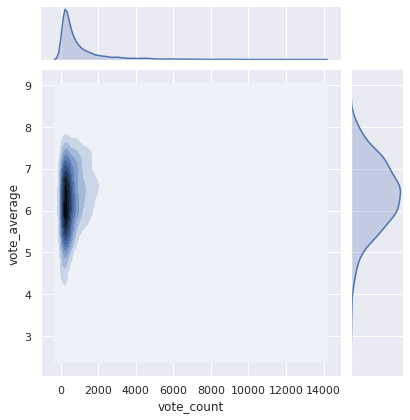

In [8]:
#　density estimates
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

## sns.pairplot()

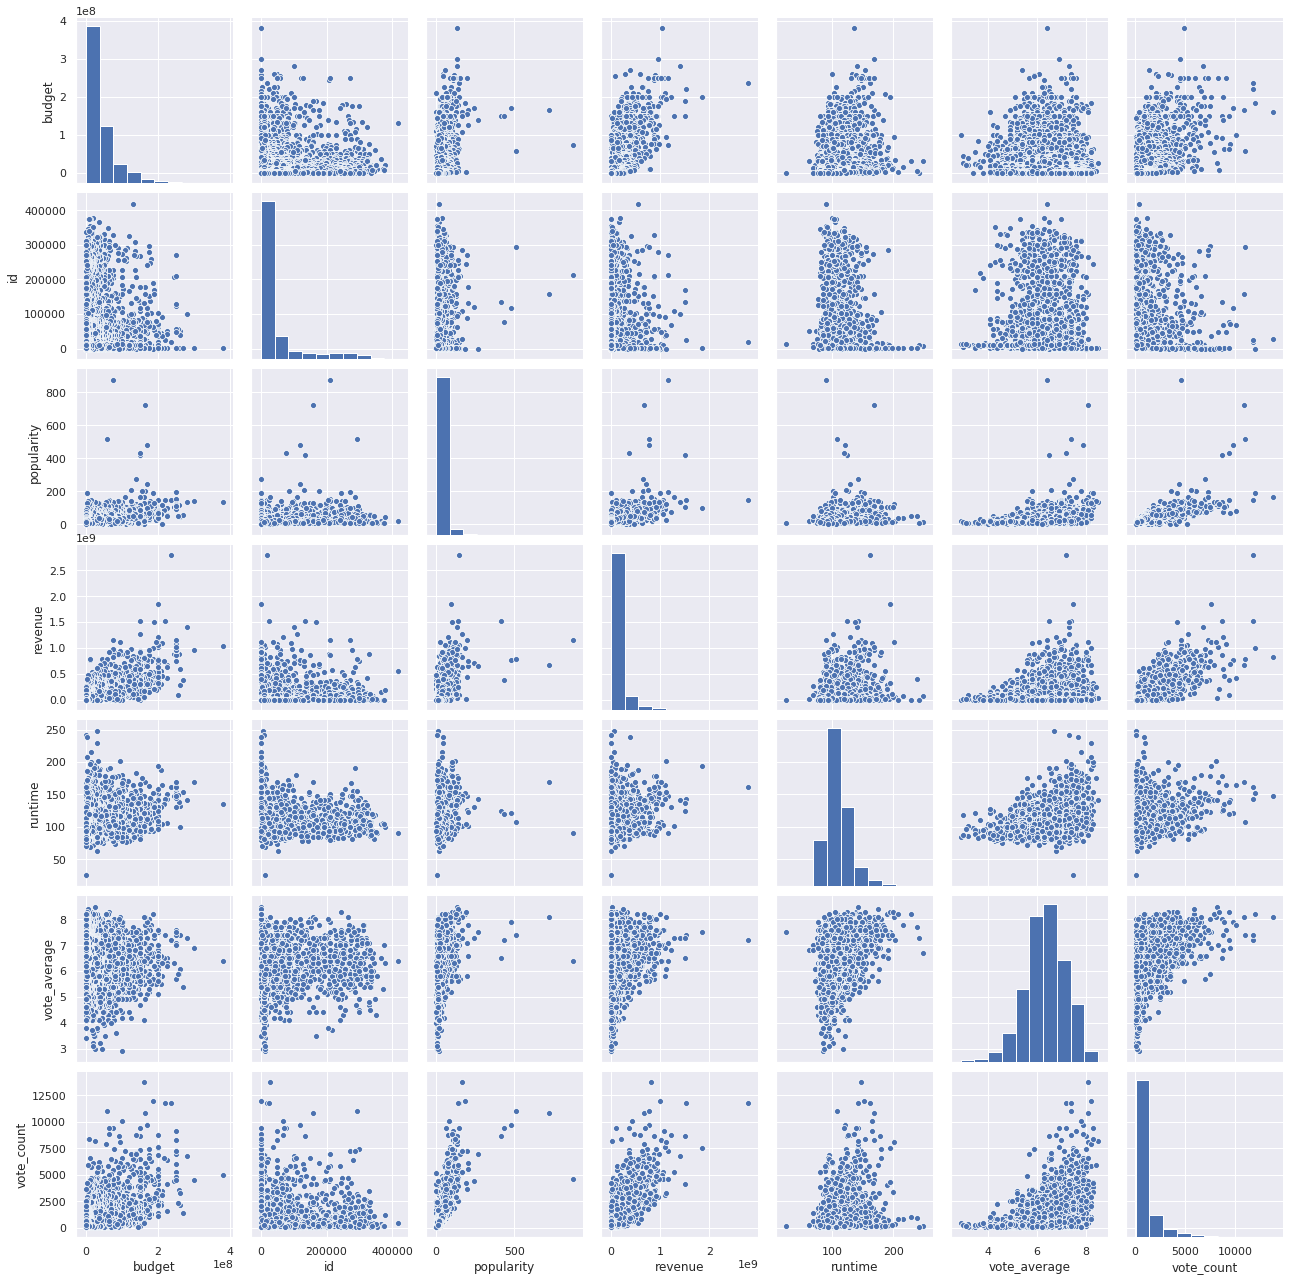

In [9]:
# DataFrameの全ての数値カラムでpairplotを作る
sns.pairplot(df)

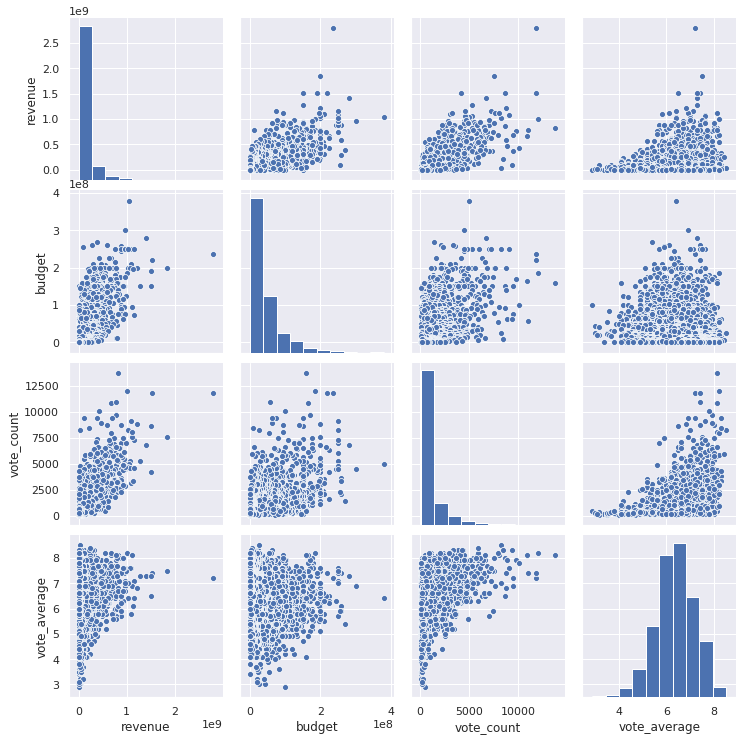

In [10]:
# 必要なカラムだけ
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

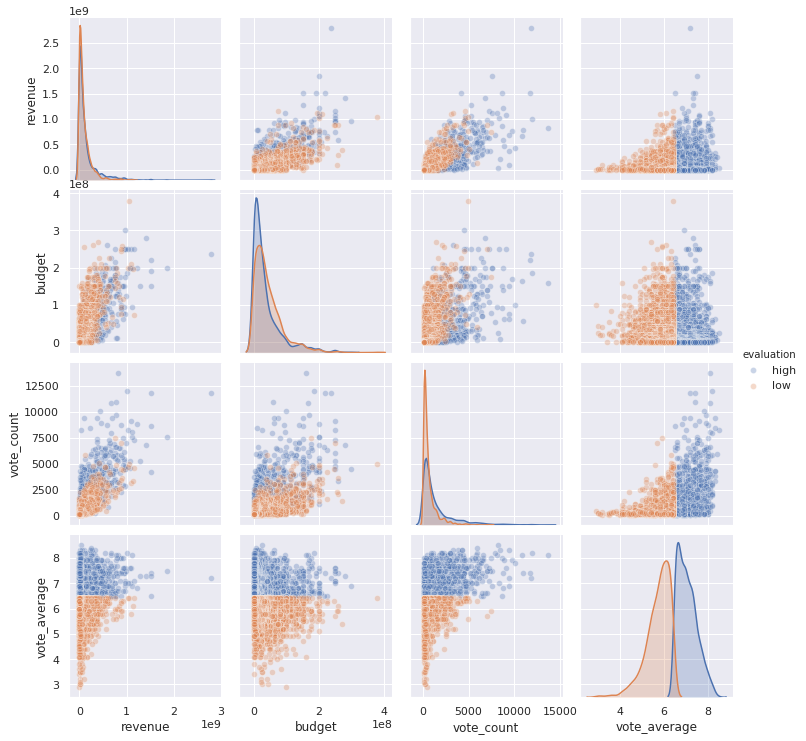

In [11]:
#hue引数で，カテゴリ別に色付け
vote_average_median = df['vote_average'].median()
# vote averageが下位50%だったらlow, 上位50%だったらhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation',
             plot_kws={'alpha':0.3},
             #diag_kind='hist'
            )


## sns.barplot()

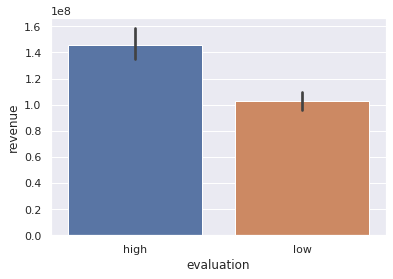

In [12]:
# 評価が高いものと低いもののrevenueのグラフ
# デフォルトでは平均値が棒グラフで表示される
sns.barplot(x='evaluation', y='revenue', data=df)

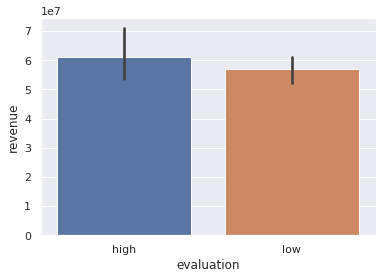

In [13]:
# estimator引数にaggregate functionを入れる
# 中央値をみる
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

## sns.countplot()

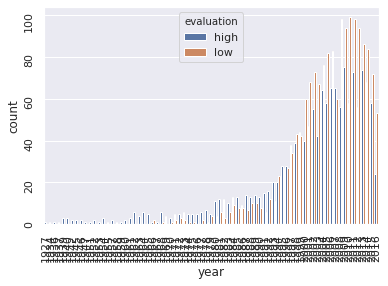

In [14]:
# 西暦別のカウント
df['year'] = df['release_date'].apply(lambda x: x[:4])
# countplotの戻り値はmatplotlibのaxes
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

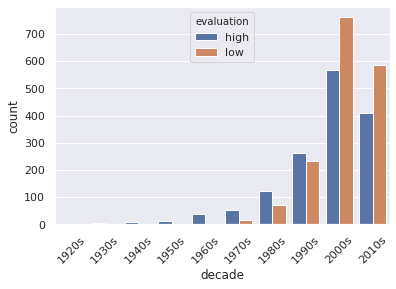

In [15]:
#　年代カラムを作る 例）2012->2010s
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')
# 直接pltで装飾することも可能
plt.xticks(rotation=45)

## sns.boxplot()

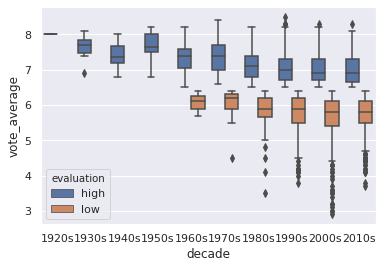

In [16]:
# 箱ひげ図(boxplot)
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'), hue='evaluation')

## sns.violinplot()

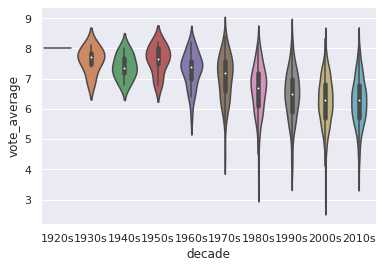

In [17]:
# violin plot 
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

## sns.swarmplot()

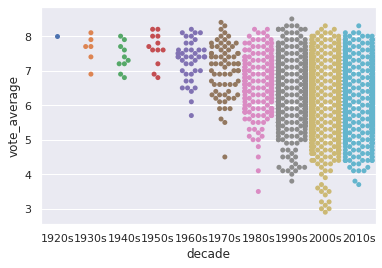

In [18]:
# swarm plot
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

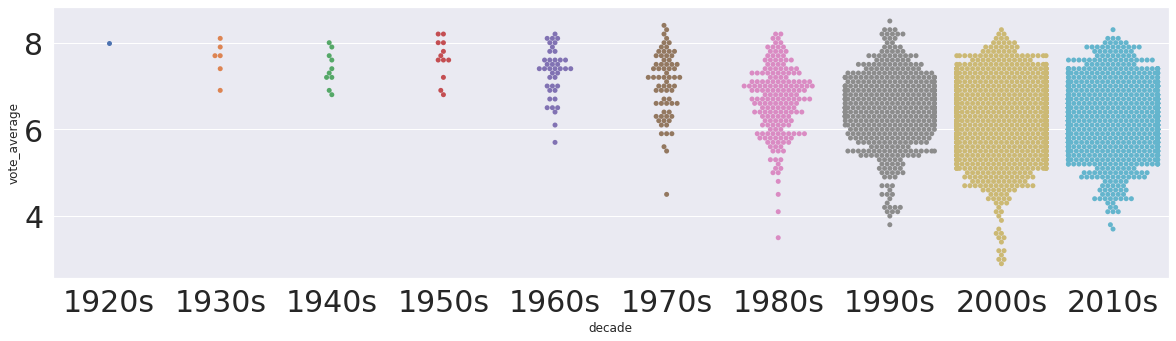

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=30)
# axesオブジェクトを引数に入れる
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))

## Heatmap
## sns.heatmap()

In [20]:
# 相関表 (Correlation Matrix)
df = pd.read_csv('tmdb_5000_movies.csv')
# 値が0を含むrowを除く
df = df[(df!=0).all(axis=1)]
corr = df.corr()
corr

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


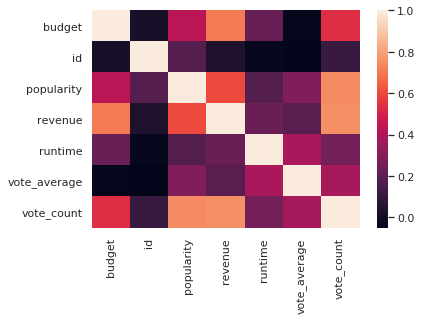

In [21]:
sns.heatmap(corr)

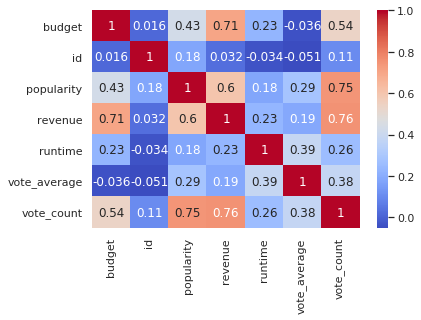

In [22]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [23]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])

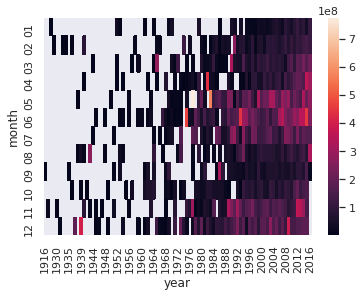

In [24]:
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(index='month', columns='year', values='revenue')
sns.heatmap(revenue_df)

## style変更
## sns.set()

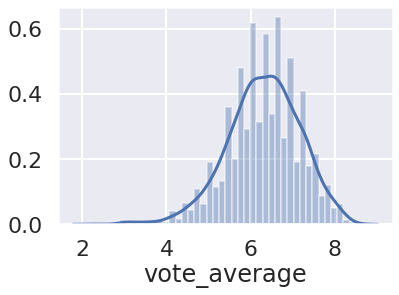

In [25]:
# context引数 : ’paper’, ‘notebook’, ‘talk’, ‘poster’
sns.set(context='poster')
# sns.set_context('poster')
sns.distplot(df['vote_average'])

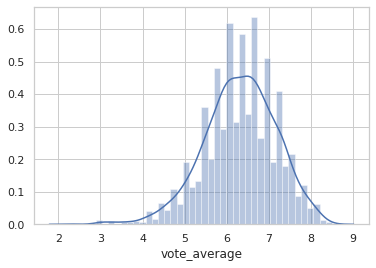

In [26]:
# style引数：‘darkgrid’, ‘whitegrid’, ‘dark’, ‘white’, ‘ticks’
sns.set(context='notebook', style='whitegrid')
# sns.set_style('whitegrid')
sns.distplot(df['vote_average'])

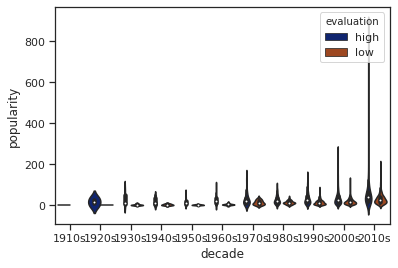

In [27]:
# palette引数 : 参考：https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html
# seabornのpalette:deep, muted, bright, pastel, dark, colorblind
sns.set(context='notebook', style='ticks', palette='dark')
#decadeカラムとevaluationカラムを追加
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
vote_average_median = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_median else 'low')
sns.violinplot(x='decade', y='popularity', data=df.sort_values('decade'), hue='evaluation')

## plt.を使う

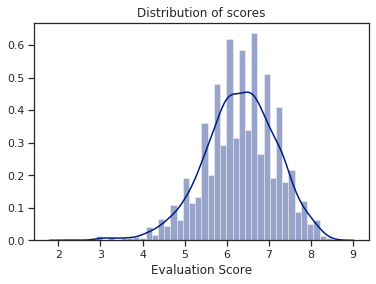

In [28]:
# snsは内部でpltを使っているので，matplotlibの装飾も同様に可能
sns.distplot(df['vote_average'])
plt.xlabel('Evaluation Score')
plt.title('Distribution of scores')
plt.savefig('saved_seaborn.png')

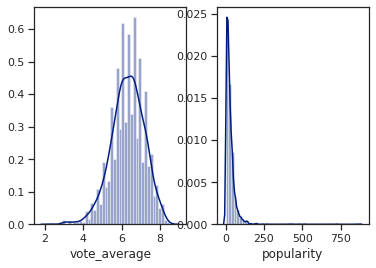

In [29]:
# axesレベルの処理も可能
fig, axes = plt.subplots(1, 2)

sns.distplot(df['vote_average'], ax=axes[0]) 
sns.distplot(df['popularity'], ax=axes[1]) 